In [1]:
import mcmc_utils

In [2]:
import surp
import vice
import numpy as np

import matplotlib.pyplot as plt

from surp.gce_math import Z_to_MH, MH_to_Z, calc_y

/users/PAS2232/aeyobd/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [3]:
vice.yields.ccsne.settings["c"] = 0

# Prior models

In [11]:
lin_model = mcmc_utils.Linear(beta0=[0, 1e-3], beta1=[0, 1])

[[-3.48408680e-04 -6.17687201e-01  9.60380196e-01]
 [ 4.91425844e-04  3.36188864e-01  1.58036520e-01]
 [ 1.74261985e-03  1.67736962e+00 -5.42811994e-01]
 [ 1.33534724e-03  1.03623784e+00  4.51763124e-01]
 [ 1.06255879e-03  9.58651580e-01  5.20046874e-01]
 [-1.58839074e-03 -1.66686564e+00  2.78052677e+00]
 [ 1.46015147e-03  1.12595875e-01 -1.41441828e+00]
 [ 1.23821743e-03 -4.49894135e-01 -1.67400035e+00]
 [-6.52494823e-04  1.29185283e+00 -3.33205375e-01]
 [-5.44586954e-04 -6.31305670e-02 -4.01598366e-01]]


100%|██████████| 1000/1000 [00:10<00:00, 97.30it/s]


$\beta_0$ = 0.00 + 0.00 - 0.00
$\beta_1$ = -0.06 + 1.02 - 1.00
$\log(\sigma)$ = 0.08 + 0.93 - 0.93


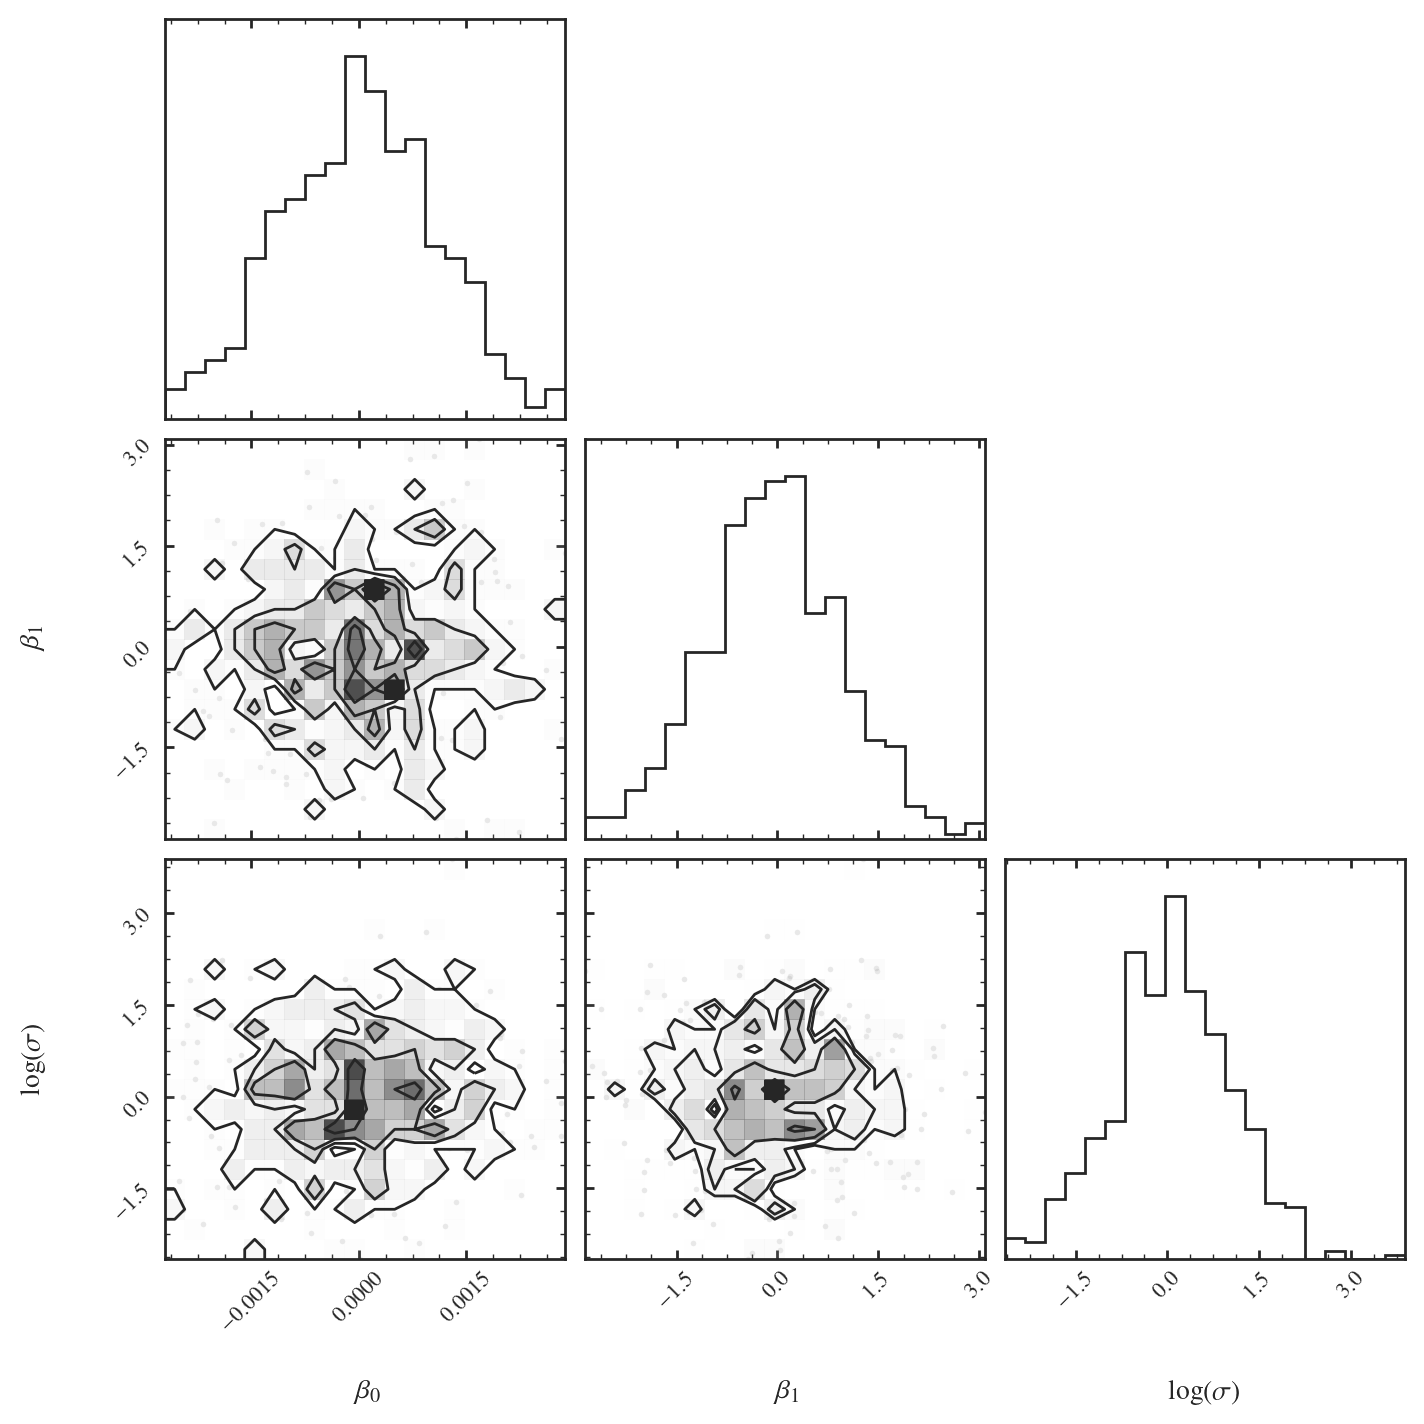

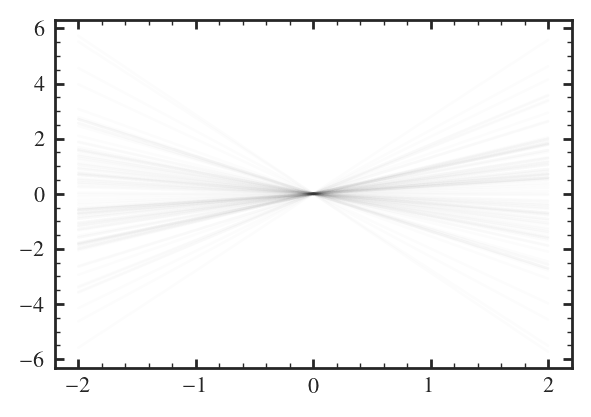

In [12]:
mcmc_utils.plot_prior(lin_model)

In [ ]:
exp_model = mcmc_utils.Exponential(beta0=) 



In [4]:
def get_yield_table(study):
    y1, m1, z1 = vice.yields.agb.grid("c", study=study)
    mh1 = Z_to_MH(z1)
    vice.yields.agb.settings["c"] = vice.yields.agb.interpolator("c", study=study)
    y_c_agb1 = np.array([calc_y(z) for z in z1])

    return mh1, y_c_agb1, None, None

In [5]:
obs = get_yield_table("cristallo11")

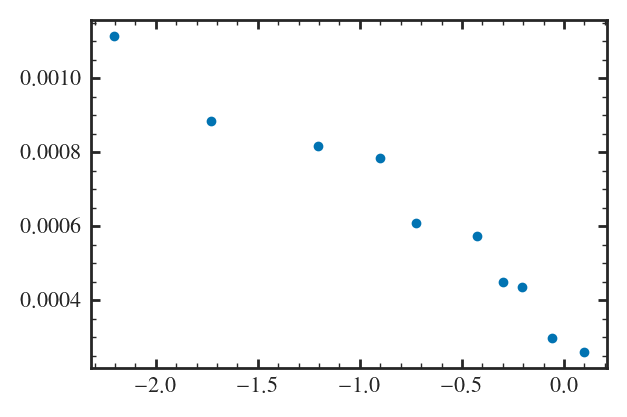

In [6]:
plt.scatter(obs[0], obs[1])

/users/PAS2232/aeyobd/surp/carbon_paper/mcmc_utils.py:113: RuntimeWarning: invalid value encountered in log
  return -0.5 * np.sum((y - pred) ** 2 / sigma2 + np.log(2 * np.pi * sigma2))
  0%|          | 0/1000 [00:00<?, ?it/s]/users/PAS2232/aeyobd/.local/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:03<00:00, 289.82it/s]


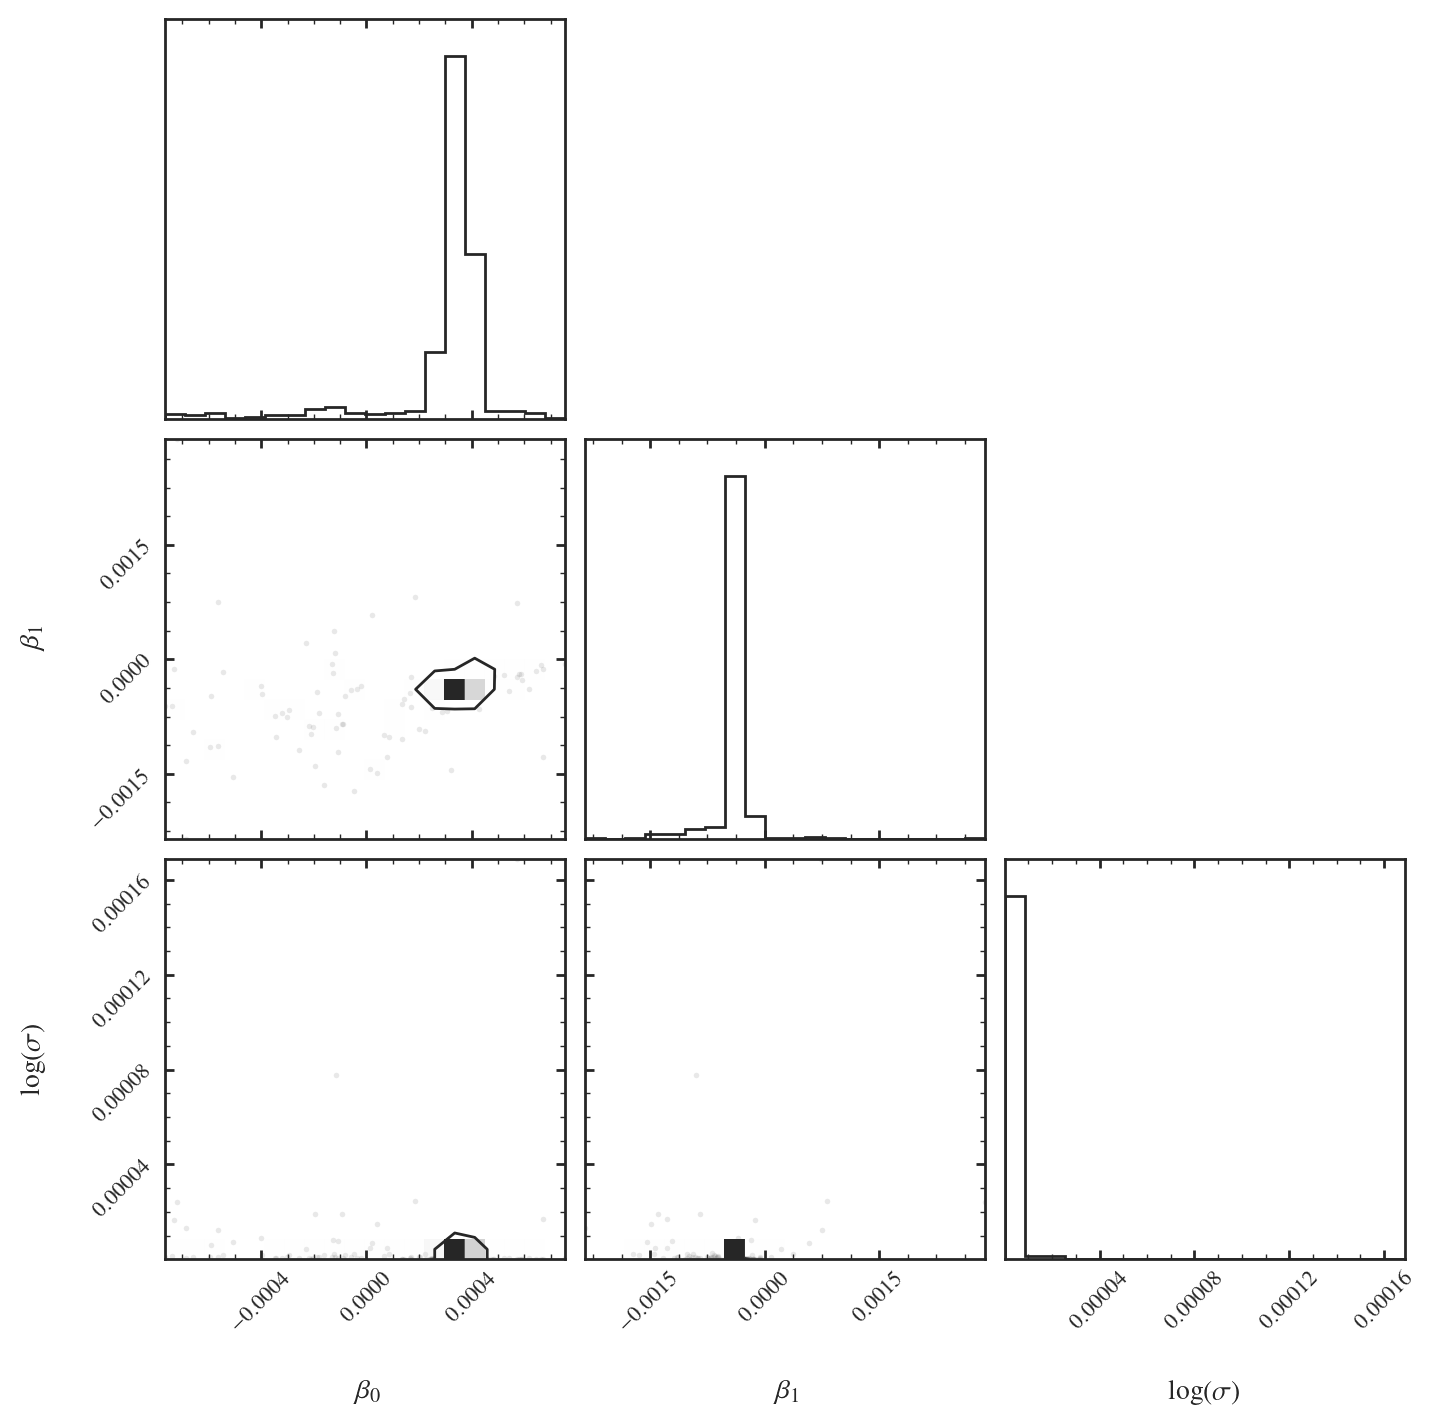

In [9]:
samples = mcmc_utils.run_mcmc(model, obs)

$\beta_0$ = 0.00 + 0.00 - 0.00
$\beta_1$ = -0.00 + 0.00 - 0.00
$\log(\sigma)$ = 0.00 + 0.00 - 0.00


(-0.0001, 0.001)

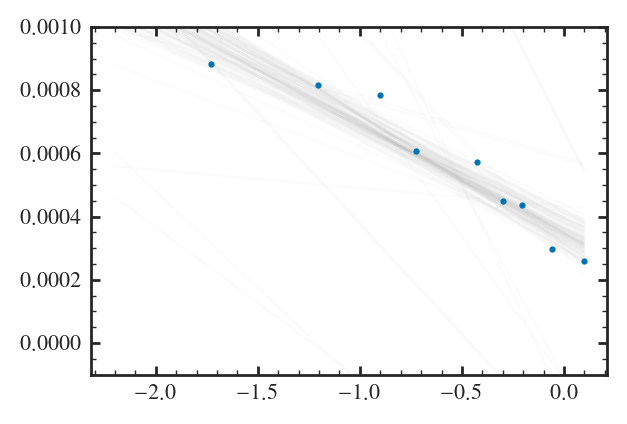

In [10]:
mcmc_utils.plot_posterior(model, obs, samples)
plt.ylim(-1e-4, 1e-3)

In [ ]:
class LinearModel():
    def __init__(self):
        pass
            
    def __call__(self, x, theta):
        m, b, σ = theta
        return m * x + b
    
    def log_prior(self, theta):
        m, b, sigma = theta
        p = 0
        p += np.log(normal(m, 0, 1e-3))
        p += np.log(normal(b, 0, 1e-3))
        p += np.log(log_normal(sigma, 1e-8, 0.5))

        if np.isnan(p):
            return -np.inf
        return p
    
    def p0(self, N):
        return [1e-3, 1e-3, 1e-8]

In [13]:
class LogLinearModel():
    def __init__(self):
        pass
            
    def __call__(self, x, theta):
        z = MH_to_Z(x)
        m, b, σ = theta
        return m * z + b
    
    def log_prior(self, theta):
        m, b, sigma = theta
        p = 0
        p += np.log(normal(m, 0, 1e-2))
        p += np.log(normal(b, 0, 3e-3))
        p += np.log(log_normal(sigma, 1e-8, 0.5))

        if np.isnan(p):
            return -np.inf
        return p
    
    def p0(self, N):
        return [1e-2, 3e-3, 1e-8]

In [14]:
def linear_model(x, theta):
    """Linear model function y = mx + b."""
    m, b, sigma = theta
    return m * x + b

In [15]:
def normal(x, mu, sigma):
    return 1/np.sqrt(2*np.pi * sigma**2) * np.exp(-(x-mu)**2 / (2*sigma**2))

def log_normal(x, mu, sigma):
    return np.where(x >= 0, normal(np.log(x), np.log(mu), sigma), 0)

In [41]:
def log_likelihood(theta, x, y, model):
    pred = model(x, theta)
    sigma2 = theta[-1]
    return -0.5 * np.sum((y - pred) ** 2 / sigma2 + np.log(2 * np.pi * sigma2))

def log_probability(theta, x, y, model):
    p = model.log_prior(theta)
    l = log_likelihood(theta, x, y, model) 
    
    lp = l + p
    return np.where(np.isfinite(lp), lp, -np.inf)

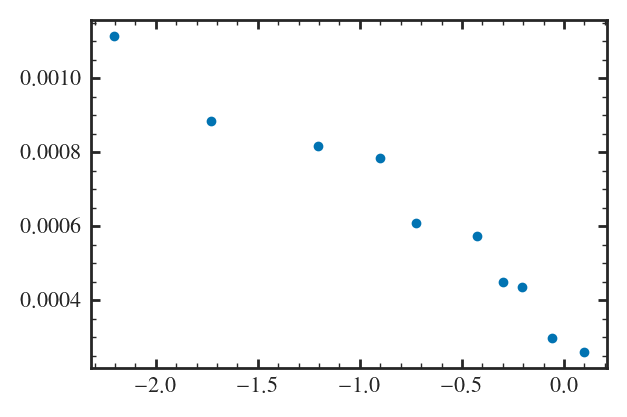

In [42]:
study = "cristallo11"
y1, m1, z1 = vice.yields.agb.grid("c", study=study)
mh1 = Z_to_MH(z1)
vice.yields.agb.settings["c"] = vice.yields.agb.interpolator("c", study=study)
y_c_agb1 = np.array([calc_y(z) for z in z1])

plt.scatter(mh1, y_c_agb1)

  2%|▏         | 22/1000 [00:00<00:04, 215.14it/s]/tmp/slurmtmp.27878957/ipykernel_269395/4271747773.py:5: RuntimeWarning: invalid value encountered in log
  return np.where(x >= 0, normal(np.log(x), np.log(mu), sigma), 0)
/tmp/slurmtmp.27878957/ipykernel_269395/2739109048.py:14: RuntimeWarning: divide by zero encountered in log
  p += np.log(log_normal(sigma, 1e-8, 0.5))
/tmp/slurmtmp.27878957/ipykernel_269395/4247209102.py:4: RuntimeWarning: invalid value encountered in log
  return -0.5 * np.sum((y - pred) ** 2 / sigma2 + np.log(2 * np.pi * sigma2))
100%|██████████| 1000/1000 [00:02<00:00, 424.78it/s]


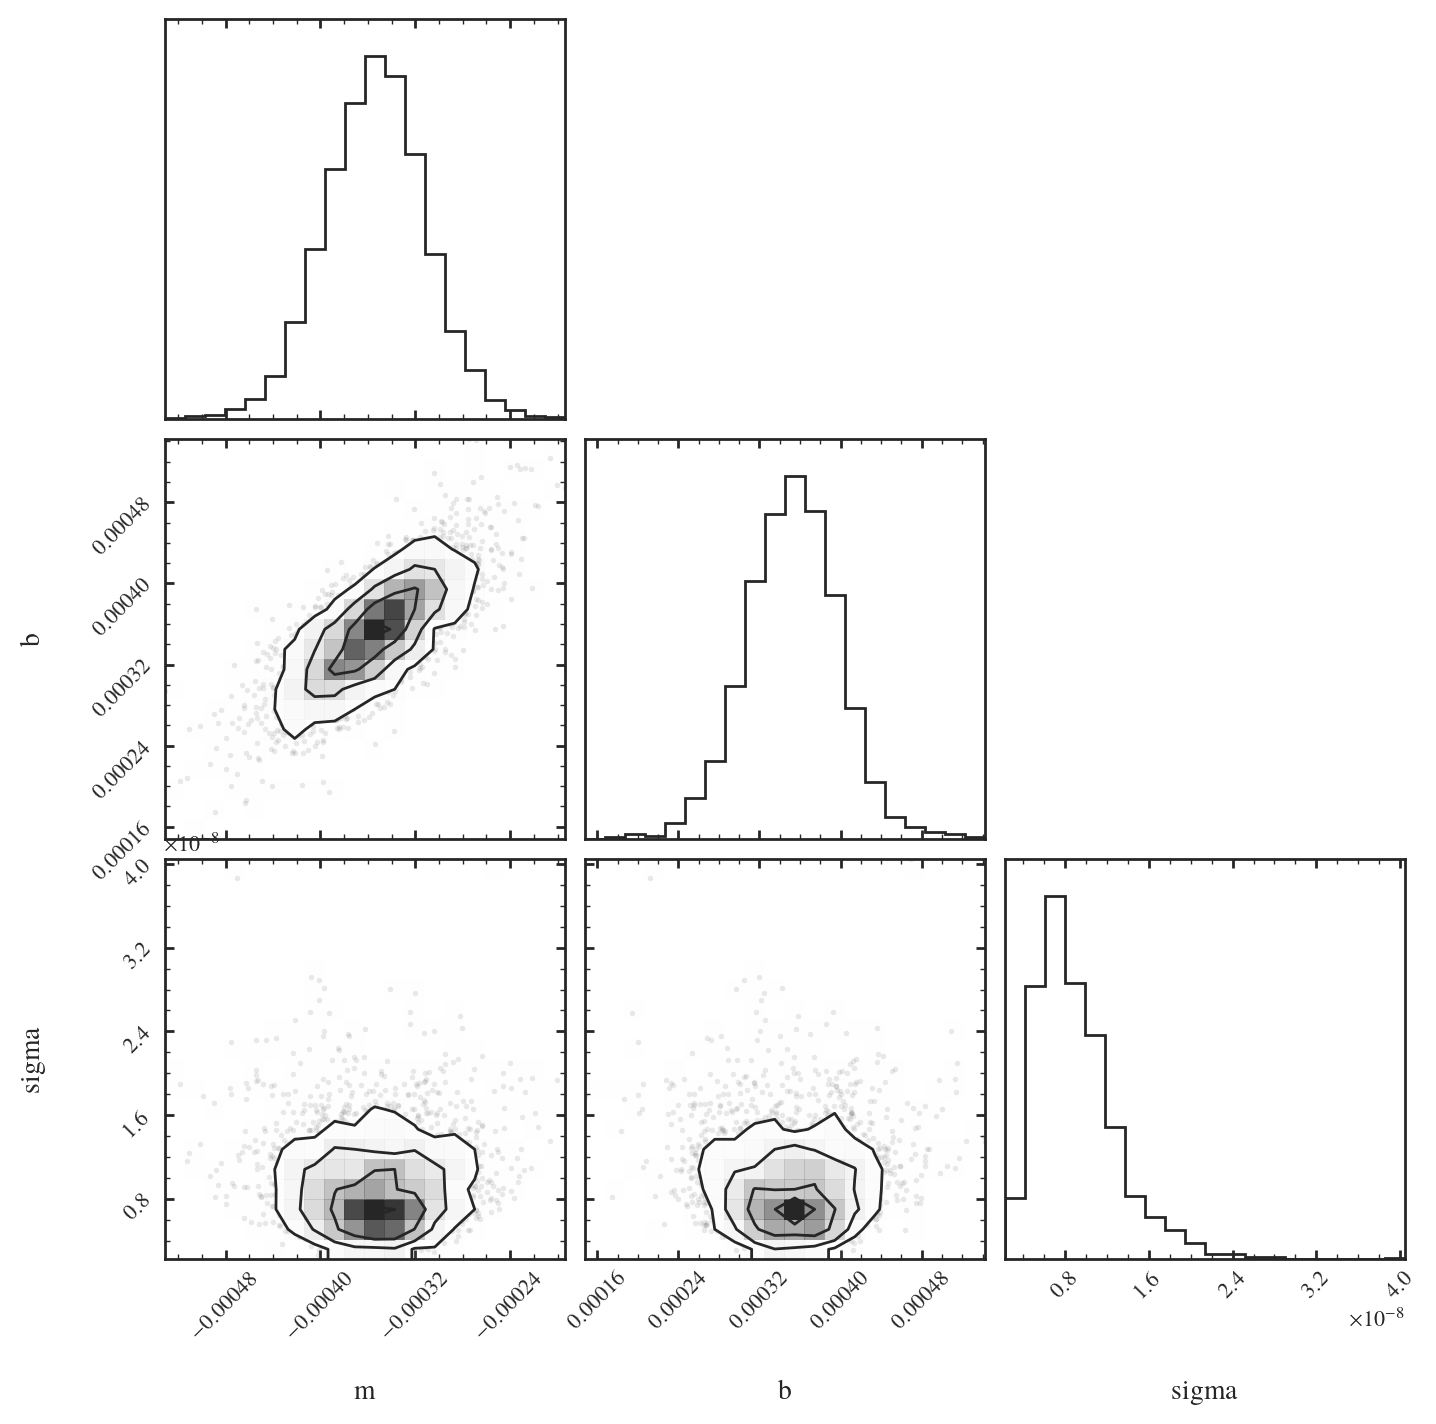

In [46]:

model = LinearModel()
p0 = model.p0(1)
ndim, nwalkers = len(p0), 50
p0 = p0 *  (1 + 1e-4 * np.random.randn(nwalkers, ndim))

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(mh1, y_c_agb1, model))
sampler.run_mcmc(p0, 1000, progress=True);
samples = sampler.get_chain(discard=100, thin=15, flat=True)
corner(samples, labels=["m", "b", "sigma"]);

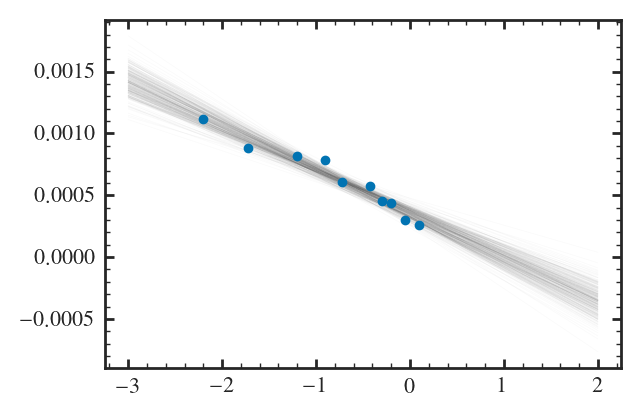

In [48]:
for i in range(0, len(samples), 10):
    theta = samples[i, :]
    x = np.linspace(-3, 2, 1000)
    y = model(x, theta)
    plt.plot(x, y, lw=0.3, color="k", alpha=0.02)
    
plt.scatter(mh1, y_c_agb1, zorder=3)


In [45]:
def print_range(l):
    m = np.median(l)
    pl = np.percentile(l, 20)
    ph = np.percentile(l, 80)
    print(f"{m:8.3e}  + {ph - m:8.3e} - {m - pl:8.3e}")

In [38]:
def print_stats():
    vice.yields.ccsne.settings["c"] = 0
    print("y(0)", calc_y())
    print("y0")
    print_range(samples[:, 1])
    print("zeta")
    print_range(samples[:, 0] / surp.Z_SUN / np.log(10))
    print("sigma")
    print_range(samples[:, 2])

In [22]:
print_stats()

y(0) 0.00028557902325407206
y0
3.513e-04  + 3.758e-05 - 3.441e-05
zeta
-9.612e-03  + 9.996e-04 - 9.135e-04
sigma
8.526e-09  + 3.628e-09 - 2.423e-09


# V13

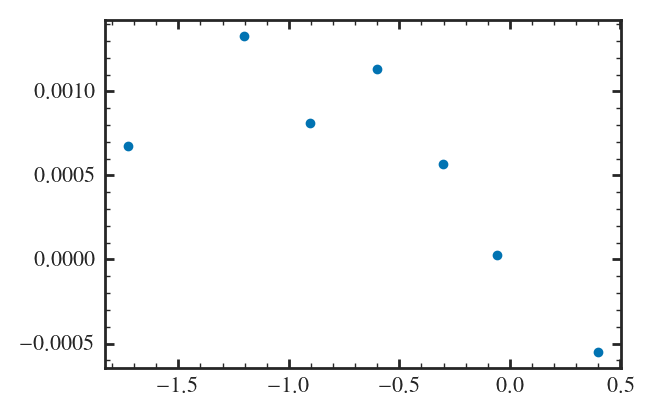

In [23]:
study = "ventura13"
y1, m1, z1 = vice.yields.agb.grid("c", study=study)
mh1 = Z_to_MH(z1)
vice.yields.agb.settings["c"] = vice.yields.agb.interpolator("c", study=study)
y_c_agb1 = calc_y(z1)

plt.scatter(mh1, y_c_agb1)

  2%|▏         | 22/1000 [00:00<00:04, 218.23it/s]/tmp/slurmtmp.27878957/ipykernel_269395/4271747773.py:5: RuntimeWarning: invalid value encountered in log
  return np.where(x >= 0, normal(np.log(x), np.log(mu), sigma), 0)
/tmp/slurmtmp.27878957/ipykernel_269395/2739109048.py:14: RuntimeWarning: divide by zero encountered in log
  p += np.log(log_normal(sigma, 1e-8, 0.5))
/tmp/slurmtmp.27878957/ipykernel_269395/4247209102.py:4: RuntimeWarning: invalid value encountered in log
  return -0.5 * np.sum((y - pred) ** 2 / sigma2 + np.log(2 * np.pi * sigma2))
100%|██████████| 1000/1000 [00:02<00:00, 413.32it/s]


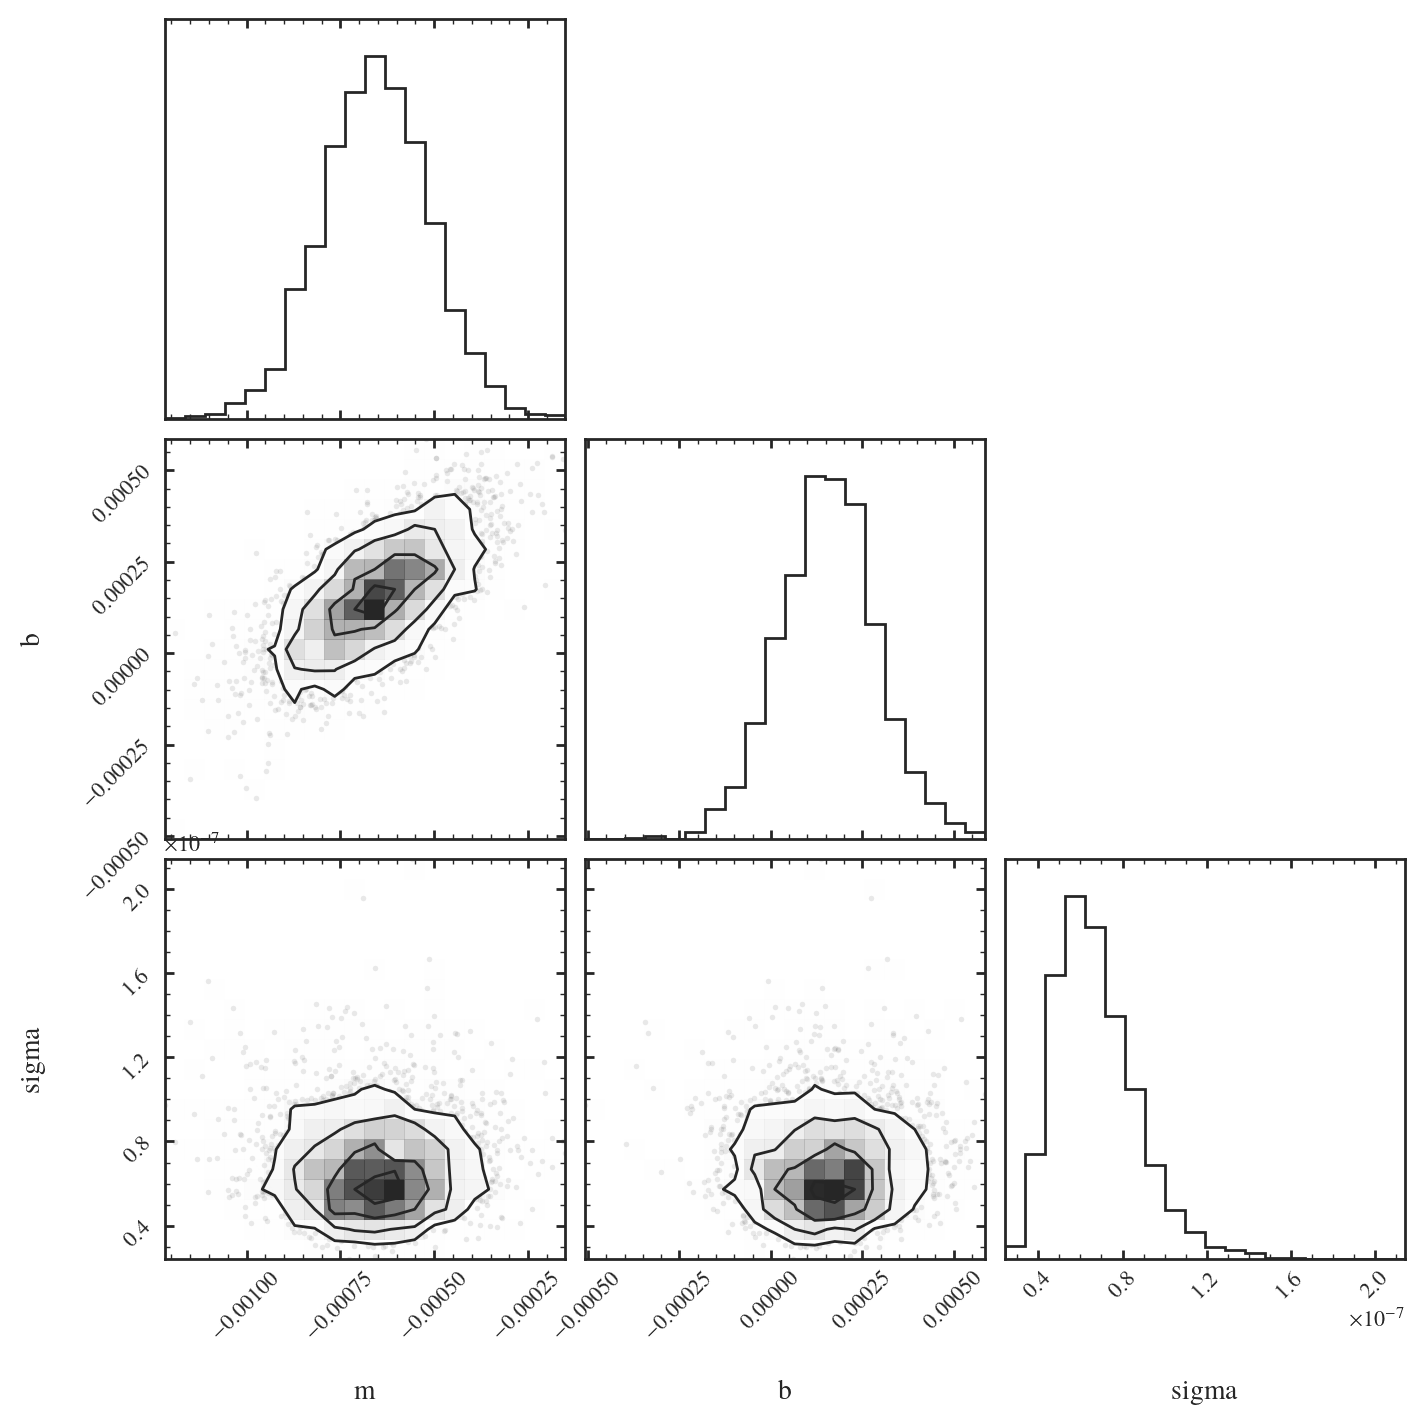

In [24]:

model = LinearModel()
p0 = model.p0(1)
ndim, nwalkers = len(p0), 50
p0 = p0 *  (1 + 1e-4 * np.random.randn(nwalkers, ndim))

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(mh1, y_c_agb1, model))
sampler.run_mcmc(p0, 1000, progress=True);
samples = sampler.get_chain(discard=100, thin=15, flat=True)
corner(samples, labels=["m", "b", "sigma"]);

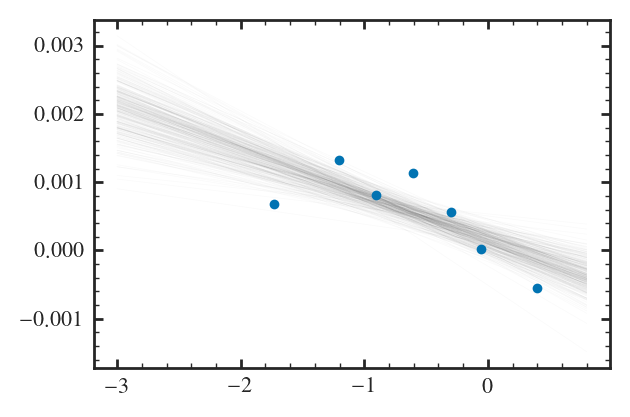

In [25]:
for i in range(0, len(samples), 10):
    theta = samples[i, :]
    x = np.linspace(-3, 0.8, 1000)
    y = model(x, theta)
    plt.plot(x, y, lw=0.3, color="k", alpha=0.02)
    
plt.scatter(mh1, y_c_agb1, zorder=3)


In [26]:
print_stats()

y(0) -1.5557976193266725e-05
y0
1.557e-04  + 1.073e-04 - 1.115e-04
zeta
-1.785e-02  + 3.313e-03 - 3.198e-03
sigma
6.449e-08  + 1.766e-08 - 1.355e-08


# K16

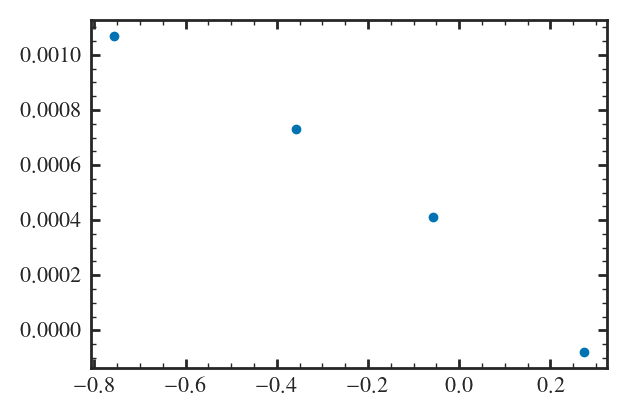

In [27]:
study = "karakas16"
y1, m1, z1 = vice.yields.agb.grid("c", study=study)
mh1 = Z_to_MH(z1)
vice.yields.agb.settings["c"] = vice.yields.agb.interpolator("c", study=study)
y_c_agb1 = calc_y(z1) 

plt.scatter(mh1, y_c_agb1)

  0%|          | 0/1000 [00:00<?, ?it/s]/tmp/slurmtmp.27878957/ipykernel_269395/4271747773.py:5: RuntimeWarning: invalid value encountered in log
  return np.where(x >= 0, normal(np.log(x), np.log(mu), sigma), 0)
/tmp/slurmtmp.27878957/ipykernel_269395/2739109048.py:14: RuntimeWarning: divide by zero encountered in log
  p += np.log(log_normal(sigma, 1e-8, 0.5))
/tmp/slurmtmp.27878957/ipykernel_269395/4247209102.py:4: RuntimeWarning: invalid value encountered in log
  return -0.5 * np.sum((y - pred) ** 2 / sigma2 + np.log(2 * np.pi * sigma2))
100%|██████████| 1000/1000 [00:02<00:00, 437.25it/s]


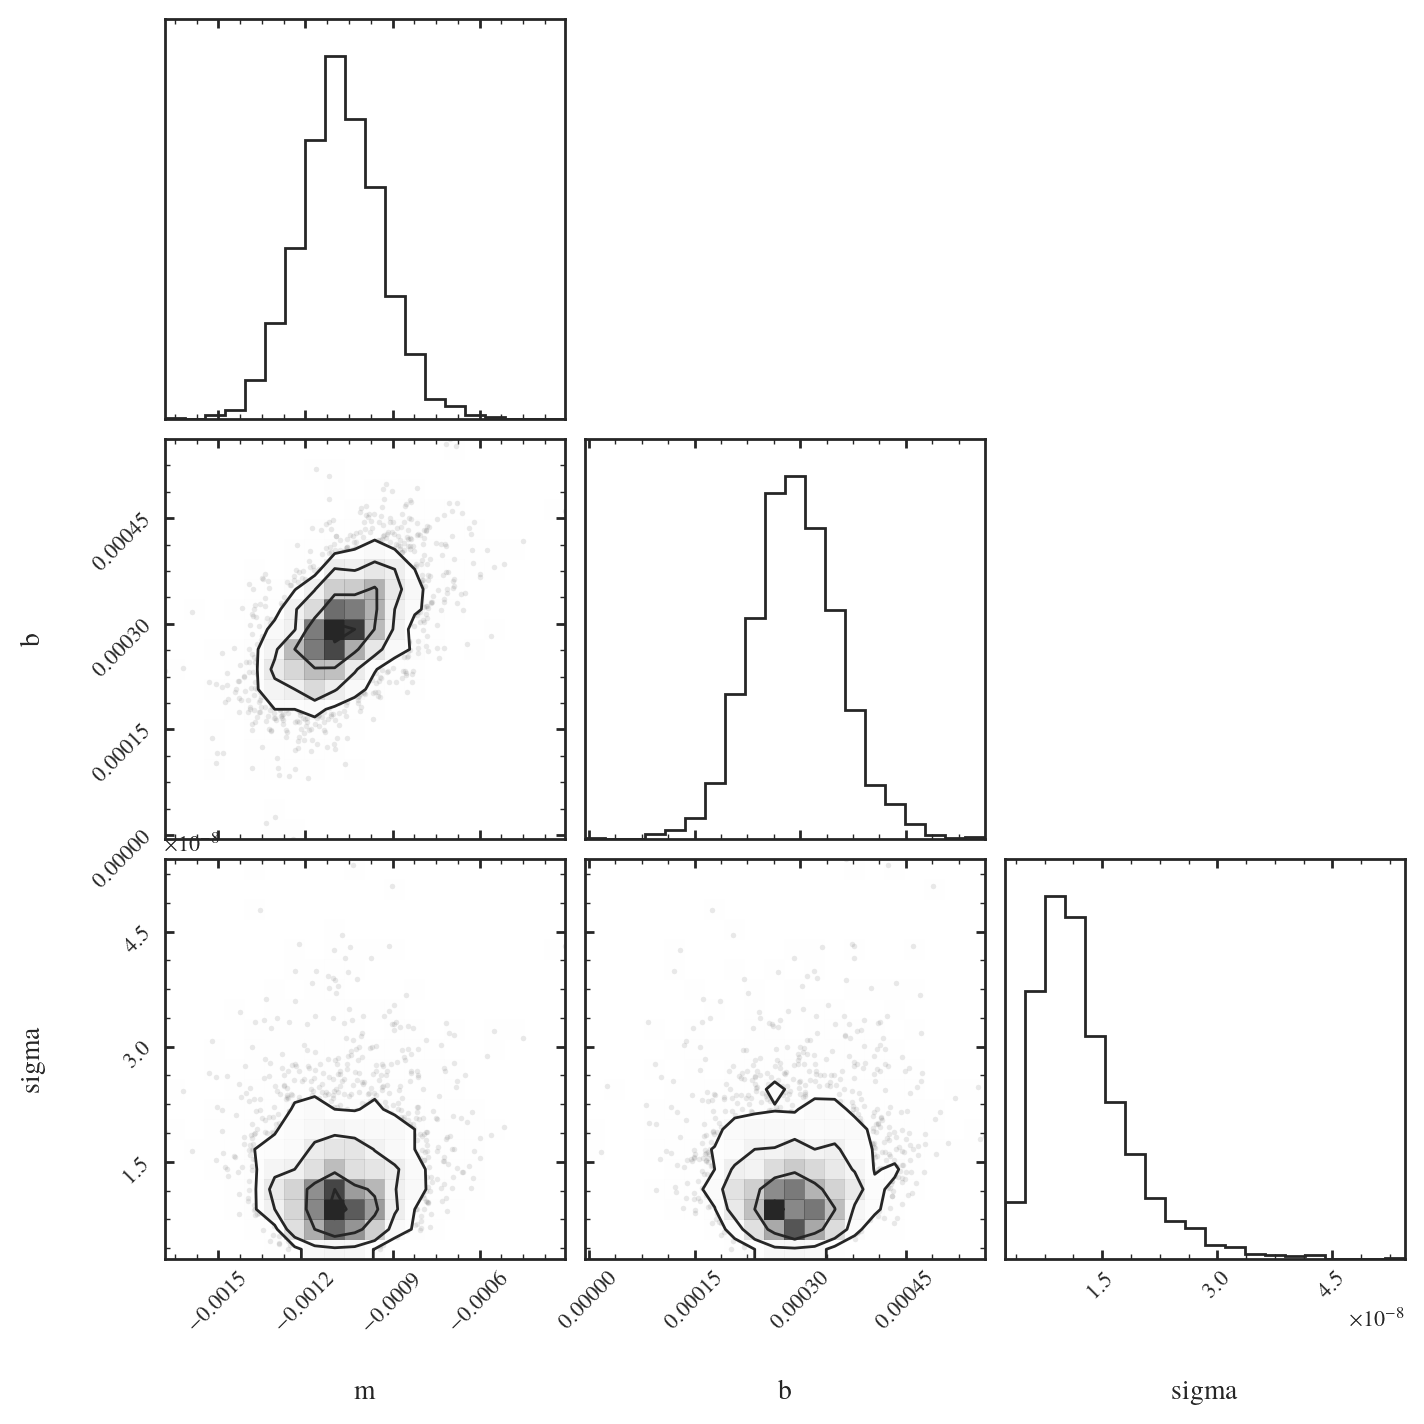

In [28]:

model = LinearModel()
p0 = model.p0(1)
ndim, nwalkers = len(p0), 50
p0 = p0 *  (1 + 1e-4 * np.random.randn(nwalkers, ndim))

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(mh1, y_c_agb1, model))
sampler.run_mcmc(p0, 1000, progress=True);
samples = sampler.get_chain(discard=100, thin=15, flat=True)
corner(samples, labels=["m", "b", "sigma"]);

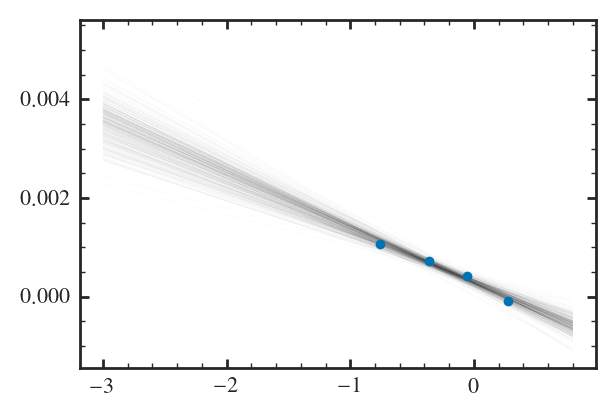

In [29]:

for i in range(0, len(samples), 10):
    theta = samples[i, :]
    x = np.linspace(-3, 0.8, 1000)
    y = model(x, theta)
    plt.plot(x, y, lw=0.3, color="k", alpha=0.02)
    
plt.scatter(mh1, y_c_agb1, zorder=3)


In [30]:
print_stats()

y(0) 0.0003497671724493468
y0
2.913e-04  + 5.164e-05 - 5.005e-05
zeta
-2.943e-02  + 3.145e-03 - 3.053e-03
sigma
1.128e-08  + 5.580e-09 - 3.666e-09


# P16

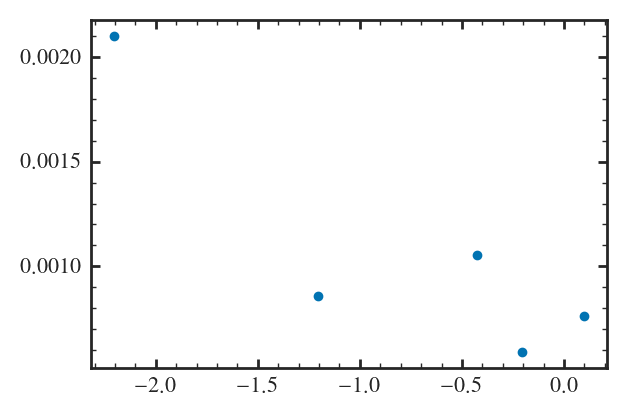

In [31]:
study = "pignatari16"
y1, m1, z1 = vice.yields.agb.grid("c", study=study)
mh1 = Z_to_MH(z1)
vice.yields.agb.settings["c"] = vice.yields.agb.interpolator("c", study=study)
y_c_agb1 = calc_y(z1)

plt.scatter(mh1, y_c_agb1)

  0%|          | 0/1000 [00:00<?, ?it/s]/tmp/slurmtmp.27878957/ipykernel_269395/4271747773.py:5: RuntimeWarning: invalid value encountered in log
  return np.where(x >= 0, normal(np.log(x), np.log(mu), sigma), 0)
/tmp/slurmtmp.27878957/ipykernel_269395/2739109048.py:14: RuntimeWarning: divide by zero encountered in log
  p += np.log(log_normal(sigma, 1e-8, 0.5))
/tmp/slurmtmp.27878957/ipykernel_269395/4247209102.py:4: RuntimeWarning: invalid value encountered in log
  return -0.5 * np.sum((y - pred) ** 2 / sigma2 + np.log(2 * np.pi * sigma2))
100%|██████████| 1000/1000 [00:02<00:00, 440.71it/s]


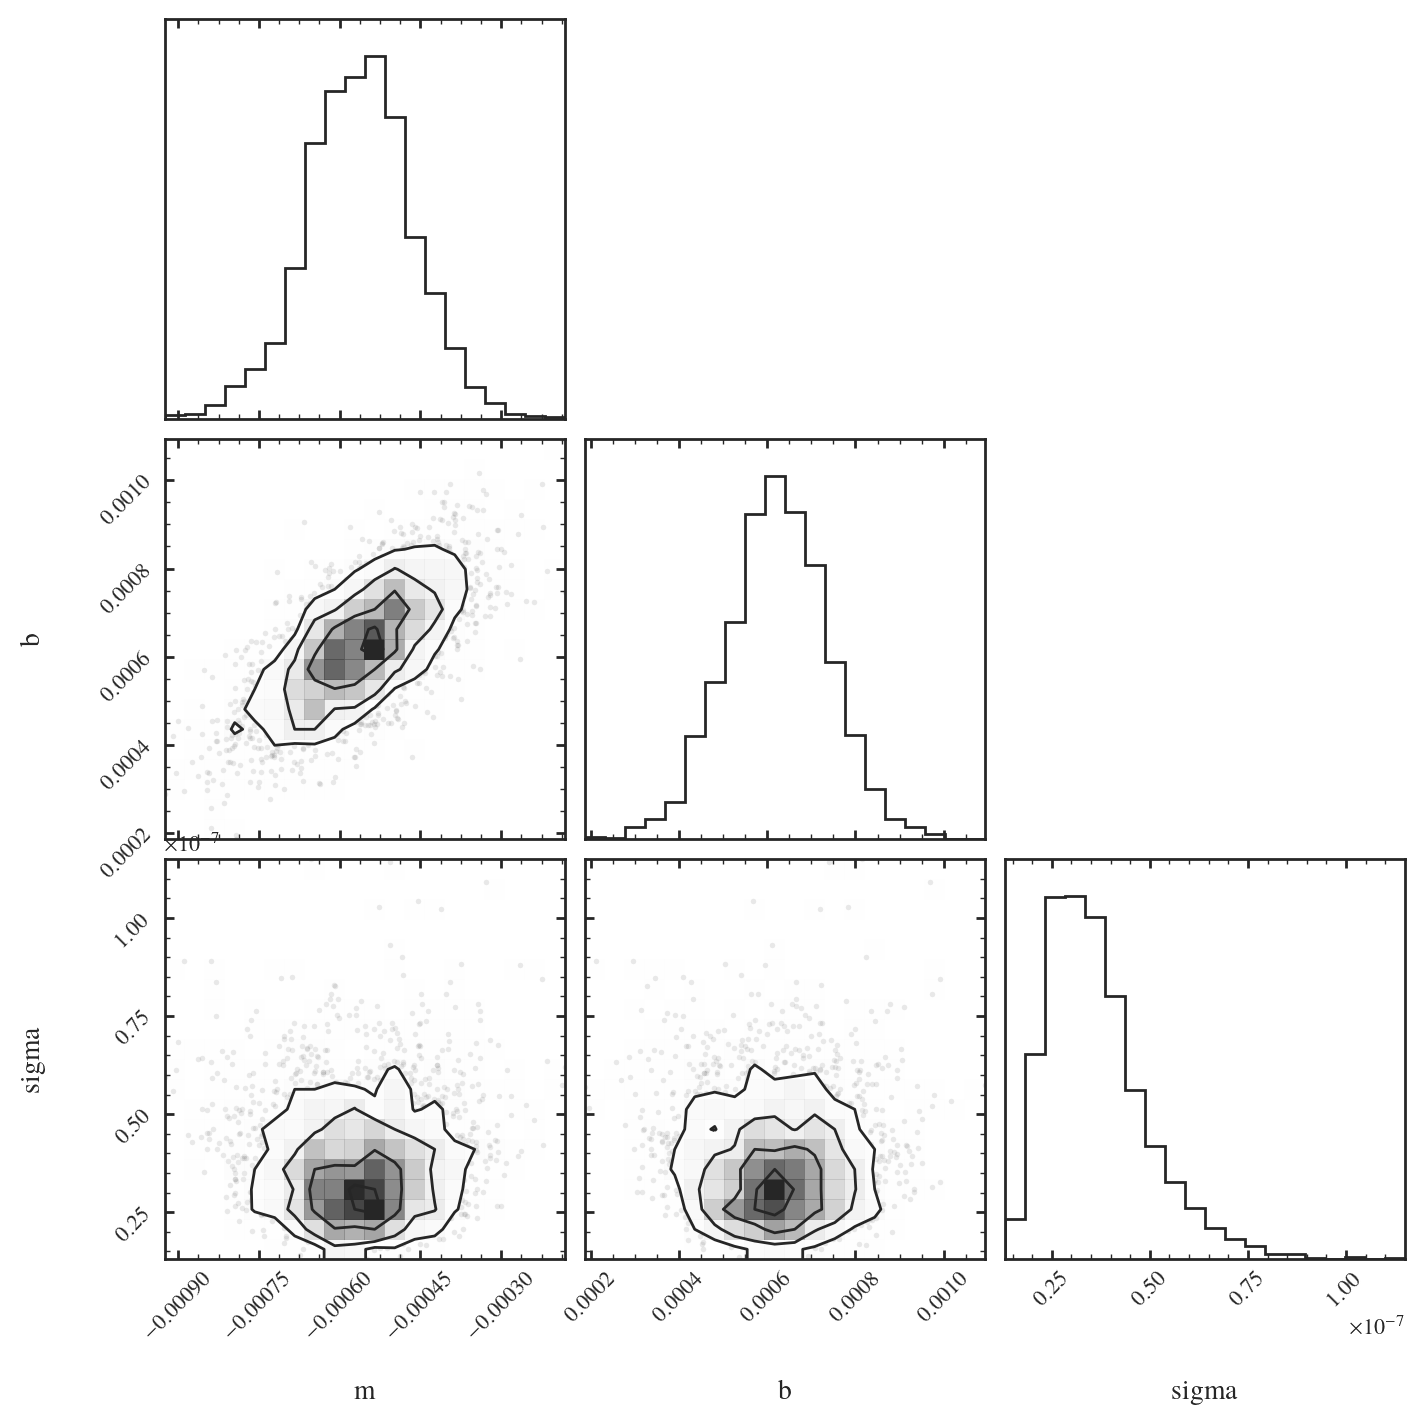

In [32]:

model = LinearModel()
p0 = model.p0(1)
ndim, nwalkers = len(p0), 50
p0 = p0 *  (1 + 1e-4 * np.random.randn(nwalkers, ndim))

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(mh1, y_c_agb1, model))
sampler.run_mcmc(p0, 1000, progress=True);
samples = sampler.get_chain(discard=100, thin=15, flat=True)
corner(samples, labels=["m", "b", "sigma"]);

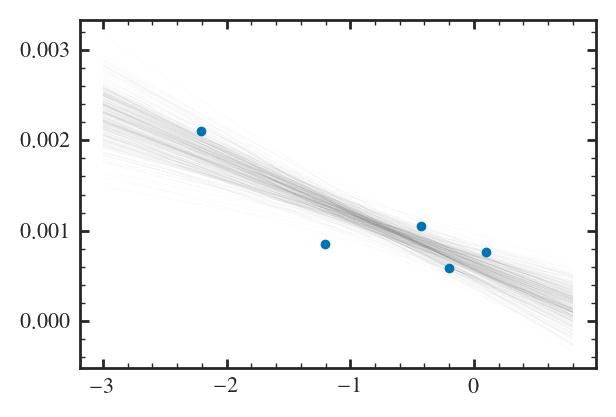

In [33]:
for i in range(0, len(samples), 10):
    theta = samples[i, :]
    x = np.linspace(-3, 0.8, 1000)
    y = model(x, theta)
    plt.plot(x, y, lw=0.3, color="k", alpha=0.02)
    
plt.scatter(mh1, y_c_agb1, zorder=3)


In [34]:
print_stats()

y(0) 0.000693482841654834
y0
6.231e-04  + 9.415e-05 - 9.295e-05
zeta
-1.530e-02  + 2.161e-03 - 2.219e-03
sigma
3.423e-08  + 1.102e-08 - 8.638e-09
